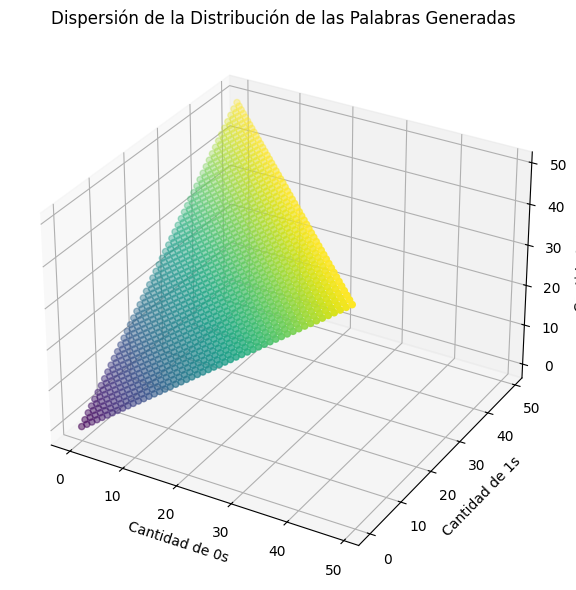

In [6]:
import nltk
from nltk import CFG
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

def generar_cadenas(gramatica, simbolo_inicial='S', max_longitud=5):
    """
    Genera todas las strings posibles de la gramática hasta una longitud máxima.
    
    :param gramatica: La gramática en formato CFG.
    :param simbolo_inicial: El símbolo inicial (por defecto 'S').
    :param max_longitud: La longitud máxima de las strings generadas.
    :return: Una lista con todas las strings posibles.
    """
    producciones = gramatica.productions()
    
    def es_terminal(simbolo):
        """Verifica si un símbolo es terminal."""
        return isinstance(simbolo, str) and simbolo in gramatica._lexical_index
    
    def generar_desde(simbolo, longitud_actual=0):
        """Genera recursivamente las cadenas a partir de un símbolo no terminal."""
        if es_terminal(simbolo):
            return [[simbolo]]  # Devuelve la cadena terminal como lista

        if longitud_actual >= max_longitud:
            return []  # No generar más si se ha alcanzado la longitud máxima

        cadenas = []
        for produccion in producciones:
            if produccion.lhs() == simbolo:
                partes = produccion.rhs()
                longitud_nueva = longitud_actual + sum(1 for s in partes if es_terminal(s))
                if longitud_nueva > max_longitud:
                    continue  # No continuar si la longitud de la cadena excede el límite
                subcadenas = [generar_desde(s, longitud_actual + 1) for s in partes]
                for combinacion in itertools.product(*subcadenas):
                    cadena_generada = [item for sublista in combinacion for item in sublista]
                    if len(cadena_generada) <= max_longitud:
                        cadenas.append(cadena_generada)
        return cadenas
    
    # Generar todas las cadenas desde el símbolo inicial
    todas_cadenas = generar_desde(gramatica.start())
    cadenas_unicas = set([' '.join(cadena) for cadena in todas_cadenas])
    return list(cadenas_unicas)

def graficar_distribucion_palabras_3d(cadenas_generadas):
    """
    Grafica una dispersión de las palabras generadas en el espacio tridimensional (ceros, unos, doses).
    
    :param cadenas_generadas: Lista de cadenas generadas.
    """
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    ceros = []
    unos = []
    doses = []

    for cadena in cadenas_generadas:
        ceros.append(cadena.count('0'))
        unos.append(cadena.count('1'))
        doses.append(cadena.count('2'))
    
    scatter = ax.scatter(ceros, unos, doses, c=doses, cmap='viridis')
    ax.set_xlabel('Cantidad de 0s')
    ax.set_ylabel('Cantidad de 1s')
    ax.set_zlabel('Cantidad de 2s')
    ax.set_title('Dispersión de la Distribución de las Palabras Generadas')
    plt.tight_layout()
    plt.show()

# Definir la gramática libre de contexto
gramatica = CFG.fromstring("""
S -> A | B
A -> '0' A '2' | '1' B '2' | ""
B -> '1' B '2' | ""
""")

# Generar cadenas hasta longitud 6
cadenas_generadas = generar_cadenas(gramatica, max_longitud=100)

# Imprimir las cadenas generadas
# for cadena in cadenas_generadas:
#     ceros = cadena.count('0')
#     unos = cadena.count('1')
#     doses = cadena.count('2')
#     print(f'{ceros} + {unos} =? {doses}', ceros + unos == doses)
#     print(f"Cadena generada: '{cadena}'")

# Graficar la distribución de las palabras generadas
graficar_distribucion_palabras(cadenas_generadas)


In [ ]:
import nltk
from nltk import CFG
import itertools
import plotly.graph_objects as go
from collections import Counter
import numpy as np

def generar_cadenas(gramatica, simbolo_inicial='S', max_longitud=5):
    """
    Genera todas las strings posibles de la gramática hasta una longitud máxima.
    
    :param gramatica: La gramática en formato CFG.
    :param simbolo_inicial: El símbolo inicial (por defecto 'S').
    :param max_longitud: La longitud máxima de las strings generadas.
    :return: Una lista con todas las strings posibles.
    """
    producciones = gramatica.productions()
    
    def es_terminal(simbolo):
        """Verifica si un símbolo es terminal."""
        return isinstance(simbolo, str) and simbolo in gramatica._lexical_index
    
    def generar_desde(simbolo, longitud_actual=0):
        """Genera recursivamente las cadenas a partir de un símbolo no terminal."""
        if es_terminal(simbolo):
            return [[simbolo]]  # Devuelve la cadena terminal como lista

        if longitud_actual >= max_longitud:
            return []  # No generar más si se ha alcanzado la longitud máxima

        cadenas = []
        for produccion in producciones:
            if produccion.lhs() == simbolo:
                partes = produccion.rhs()
                longitud_nueva = longitud_actual + sum(1 for s in partes if es_terminal(s))
                if longitud_nueva > max_longitud:
                    continue  # No continuar si la longitud de la cadena excede el límite
                subcadenas = [generar_desde(s, longitud_actual + 1) for s in partes]
                for combinacion in itertools.product(*subcadenas):
                    cadena_generada = [item for sublista in combinacion for item in sublista]
                    if len(cadena_generada) <= max_longitud:
                        cadenas.append(cadena_generada)
        return cadenas
    
    # Generar todas las cadenas desde el símbolo inicial
    todas_cadenas = generar_desde(gramatica.start())
    cadenas_unicas = set([' '.join(cadena) for cadena in todas_cadenas])
    return list(cadenas_unicas)

def graficar_distribucion_palabras_todas_iteraciones(cadenas_generadas_por_iteracion):
    """
    Grafica una dispersión de las palabras generadas en el espacio tridimensional (ceros, unos, doses) para todas las iteraciones usando Plotly.
    
    :param cadenas_generadas_por_iteracion: Lista de listas, donde cada sublista contiene las cadenas generadas en una iteración.
    """
    fig = go.Figure()

    colores = np.linspace(0, 1, len(cadenas_generadas_por_iteracion))
    
    # Invertir el orden de las iteraciones para plotear desde la última hasta la primera
    for idx in reversed(range(len(cadenas_generadas_por_iteracion))):
        cadenas_generadas = cadenas_generadas_por_iteracion[idx]
        ceros = []
        unos = []
        doses = []

        for cadena in cadenas_generadas:
            ceros.append(cadena.count('0'))
            unos.append(cadena.count('1'))
            doses.append(cadena.count('2'))
        
        fig.add_trace(go.Scatter3d(
            x=ceros,
            y=unos,
            z=doses,
            mode='markers',
            marker=dict(
                size=5,
                color=colores[idx],  # Color diferente para cada iteración
                colorscale='Viridis',
                opacity=0.8
            ),
            name=f'Iteración {idx + 1}'
        ))
    
    fig.update_layout(
        scene=dict(
            xaxis_title='Cantidad de 0s',
            yaxis_title='Cantidad de 1s',
            zaxis_title='Cantidad de 2s'
        ),
        title='Dispersión de la Distribución de las Palabras Generadas en Todas las Iteraciones'
    )
    fig.show(renderer='browser')  # Cambiar el renderer a 'browser' para evitar problemas de visualización en algunos entornos

# Definir la gramática libre de contexto
gramatica = CFG.fromstring("""
S -> A | B
A -> '0' A '2' | '1' B '2' | ""
B -> '1' B '2' | ""
""")

# Generar y acumular las cadenas en cada iteración
generar_hasta = 50
cadenas_generadas_por_iteracion = []

for n in range(1, generar_hasta + 1):
    cadenas_generadas = generar_cadenas(gramatica, max_longitud=n)
    cadenas_generadas_por_iteracion.append(cadenas_generadas)
    
    # Imprimir las cadenas generadas
    print(f"Iteración {n}", cadenas_generadas)
    # for cadena in cadenas_generadas:
    #     ceros = cadena.count('0')
    #     unos = cadena.count('1')
    #     doses = cadena.count('2')
    #     print(f'{ceros} + {unos} =? {doses}', ceros + unos == doses)
    #     print(f"Cadena generada: '{cadena}'")

# Graficar la distribución de las letras en las palabras generadas para todas las iteraciones
graficar_distribucion_palabras_todas_iteraciones(cadenas_generadas_por_iteracion)


Iteración 1 []
Iteración 2 ['']
Iteración 3 ['', '0  2', '1  2']
Iteración 4 ['', '0  2', '1  2']
Iteración 5 ['', '0  2', '1 1  2 2', '0 0  2 2', '0 1  2 2', '1  2']
Iteración 6 ['', '0  2', '1 1  2 2', '0 0  2 2', '0 1  2 2', '1  2']
Iteración 7 ['', '0  2', '0 0 1  2 2 2', '0 0  2 2', '1 1  2 2', '0 1  2 2', '1  2', '0 1 1  2 2 2', '1 1 1  2 2 2', '0 0 0  2 2 2']
Iteración 8 ['', '0  2', '0 0 1  2 2 2', '0 0  2 2', '1 1  2 2', '0 1  2 2', '1  2', '0 1 1  2 2 2', '1 1 1  2 2 2', '0 0 0  2 2 2']
Iteración 9 ['', '1 1 1 1  2 2 2 2', '0 1 1 1  2 2 2 2', '0  2', '0 0 0 0  2 2 2 2', '0 0 1  2 2 2', '0 0  2 2', '0 0 0 1  2 2 2 2', '1 1 1  2 2 2', '1 1  2 2', '0 1  2 2', '1  2', '0 1 1  2 2 2', '0 0 1 1  2 2 2 2', '0 0 0  2 2 2']
Iteración 10 ['', '1 1 1 1  2 2 2 2', '0 1 1 1  2 2 2 2', '0  2', '0 0 0 0  2 2 2 2', '0 0 1  2 2 2', '0 0  2 2', '0 0 0 1  2 2 2 2', '1 1 1  2 2 2', '1 1  2 2', '0 1  2 2', '1  2', '0 1 1  2 2 2', '0 0 1 1  2 2 2 2', '0 0 0  2 2 2']
Iteración 11 ['', '0  2', '1 1 